In [2]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('portuguese'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel('C:\\Users\\Taynara\\Desktop\\Dados.xlsx')
df.head()

,Órgãos,Ementas,N. Processos,Apelantes,Apelados,Relatores,N. Acórdãos,Decisões,Datas,Saída
0,3ª Turma Cível,PROCESSO CIVIL. PENSÃO POR MORTE DE SERVIDOR P...,AGRAVO DE INSTRUMENTO 0703201-60.2018.8.07.0000,DISTRITO FEDERAL,SILVIA SANTANA NOBRE,MARIA DE LOURDES ABREU,1116154,"CONHECER E DAR PARCIAL PROVIMENTO, UNÂNIME",18 de Julho de 2018,Parcialmente
1,3ª Turma Cível,PROCESSO CIVIL. PRELIMINAR. CERCEAMENTO DE DEF...,APELAÇÃO CÍVEL 0716314-15.2017.8.07.0001,LUIS HENRIQUE ALMEIDA PRADO DE OLIVEIRA e MART...,MARTA REGINA QUEIROZ ROSSIGNOLLI e LUIS HENRIQ...,MARIA DE LOURDES ABREU,1148840,"CONHECER, REJEITAR AS PRELIMINARES, NEGAR PROV...",06 de Fevereiro de 2019,Desprovido
2,4ª Turma Cível,APELAÇÃO CÍVEL. AÇÃO CUMPRIMENTO DE PRECEITO L...,APELAÇÃO CÍVEL 0709736-02.2018.8.07.0001,ESCRITORIO CENTRAL DE ARRECADACAO E DISTRIBUIC...,NOVA GAZICO SERVICOS EM TECNOLOGIA DA INFORMAC...,SÉRGIO ROCHA,1158566,"NEGAR PROVIMENTO AO RECURSO, UNÂNIME",13 de Março de 2019,Desprovido
3,3ª Turma Cível,APELAÇÃO CÍVEL. AÇÃO DE BUSCA E APREENSÃO. MÚT...,APELAÇÃO CÍVEL 0703630-12.2018.8.07.0005,BV FINANCEIRA S/A CFI,JAKISON RAYRON ARAUJO PEIXOTO,ALVARO CIARLINI,1174071,"CONHECER E NEGAR PROVIMENTO, UNÂNIME",22 de Maio de 2019,Desprovido
4,3ª Turma Cível,APELAÇÃO CÍVEL. ADMINISTRATIVO E CONSTITUCIONA...,APELAÇÃO CÍVEL 0702545-10.2017.8.07.0010,CLEMENTINO PEREIRA MATOS NETO,DISTRITO FEDERAL e SERVICOS HOSPITALARES YUGE S.A,ALVARO CIARLINI,1174078,"CONHECER, ACOLHER A PRELIMINAR DE NULIDADE DA ...",22 de Maio de 2019,Outros


In [4]:
df.count()

Órgãos          15521
Ementas         15521
N. Processos    15521
Apelantes       15521
Apelados        15521
Relatores       15521
N. Acórdãos     15521
Decisões        15521
Datas           15521
Saída           15521
dtype: int64

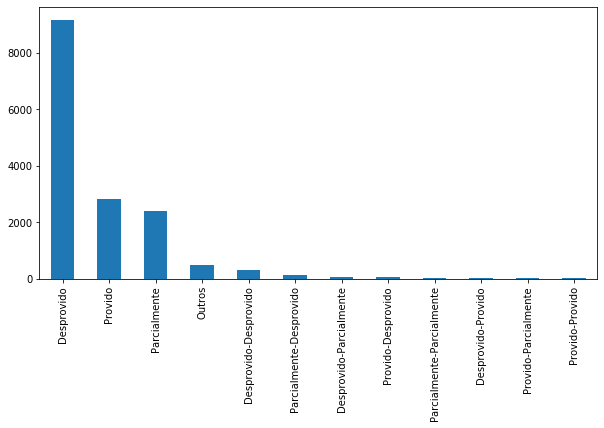

In [5]:
df['Saída'].value_counts().plot.bar(figsize=(10,5))

In [6]:
df['Saída'].isnull().sum()

0

In [7]:
df = df.dropna()

y = df['Saída'].str.lower()
sentences = df['Decisões'].str.lower()

In [8]:
sentences = sentences.values
y = y.values

In [9]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.20, random_state=42, shuffle=True)

In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

### Naive Bayes

In [12]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy for data: {:.4f}'.format(score))

                           precision    recall  f1-score   support

               desprovido       1.00      0.97      0.99      1824
    desprovido-desprovido       0.75      0.87      0.81        60
  desprovido-parcialmente       0.12      0.17      0.14        12
       desprovido-provido       0.00      0.00      0.00         6
                   outros       0.79      0.96      0.87        98
             parcialmente       0.98      0.98      0.98       488
  parcialmente-desprovido       0.26      0.82      0.40        17
parcialmente-parcialmente       0.75      0.43      0.55         7
                  provido       0.96      0.96      0.96       565
       provido-desprovido       1.00      0.24      0.38        21
     provido-parcialmente       0.00      0.00      0.00         5
          provido-provido       0.00      0.00      0.00         2

                 accuracy                           0.96      3105
                macro avg       0.55      0.53      0.51    

C:\Users\Taynara\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### LinearSVC

In [13]:
classifier = LinearSVC()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy for data: {:.4f}'.format(score))

                           precision    recall  f1-score   support

               desprovido       1.00      0.99      1.00      1824
    desprovido-desprovido       0.80      0.92      0.85        60
  desprovido-parcialmente       0.38      0.25      0.30        12
       desprovido-provido       0.33      0.17      0.22         6
                   outros       0.99      0.98      0.98        98
             parcialmente       1.00      0.99      0.99       488
  parcialmente-desprovido       0.56      0.82      0.67        17
parcialmente-parcialmente       0.67      0.86      0.75         7
                  provido       0.99      1.00      1.00       565
       provido-desprovido       0.85      0.81      0.83        21
     provido-parcialmente       1.00      0.80      0.89         5
          provido-provido       1.00      0.50      0.67         2

                 accuracy                           0.98      3105
                macro avg       0.80      0.76      0.76    

### Logistic Regression


In [15]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy for data: {:.4f}'.format(score))

                           precision    recall  f1-score   support

               desprovido       1.00      0.99      1.00      1824
    desprovido-desprovido       0.80      0.93      0.86        60
  desprovido-parcialmente       0.38      0.25      0.30        12
       desprovido-provido       0.00      0.00      0.00         6
                   outros       0.98      0.99      0.98        98
             parcialmente       1.00      1.00      1.00       488
  parcialmente-desprovido       0.44      0.71      0.55        17
parcialmente-parcialmente       0.86      0.86      0.86         7
                  provido       0.99      1.00      1.00       565
       provido-desprovido       0.74      0.67      0.70        21
     provido-parcialmente       1.00      0.20      0.33         5
          provido-provido       0.00      0.00      0.00         2

                 accuracy                           0.98      3105
                macro avg       0.68      0.63      0.63    

### Nearest Neighbors

In [16]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy for data: {:.4f}'.format(score))

                           precision    recall  f1-score   support

               desprovido       0.98      1.00      0.99      1824
    desprovido-desprovido       0.88      0.63      0.74        60
  desprovido-parcialmente       0.22      0.33      0.27        12
       desprovido-provido       0.00      0.00      0.00         6
                   outros       0.97      0.86      0.91        98
             parcialmente       0.99      0.99      0.99       488
  parcialmente-desprovido       0.32      0.41      0.36        17
parcialmente-parcialmente       0.75      0.43      0.55         7
                  provido       0.99      0.99      0.99       565
       provido-desprovido       0.62      0.38      0.47        21
     provido-parcialmente       1.00      0.20      0.33         5
          provido-provido       0.00      0.00      0.00         2

                 accuracy                           0.97      3105
                macro avg       0.64      0.52      0.55    

### Decision Trees

In [17]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy for data: {:.4f}'.format(score))

                           precision    recall  f1-score   support

               desprovido       1.00      0.99      1.00      1824
    desprovido-desprovido       0.82      0.92      0.87        60
  desprovido-parcialmente       0.30      0.25      0.27        12
       desprovido-provido       0.25      0.17      0.20         6
                   outros       0.99      0.98      0.98        98
             parcialmente       1.00      0.99      0.99       488
  parcialmente-desprovido       0.45      0.53      0.49        17
parcialmente-parcialmente       0.50      0.86      0.63         7
                  provido       0.99      1.00      1.00       565
       provido-desprovido       0.88      0.71      0.79        21
     provido-parcialmente       1.00      0.80      0.89         5
          provido-provido       0.50      0.50      0.50         2

                 accuracy                           0.98      3105
                macro avg       0.72      0.72      0.72    